# Bayesian Regression Analysis of Brain Size and Body Mass
## Introduction

In this analysis, I explored the relationship between brain size and body mass in mammals using Bayesian regression. The dataset was taken from Kaggle and contains measurements of brain and body weights for various mammals.

## Setting up  necessary R-libraries and clean dataset
I used the R programming language in Google Colab and started by setting up the necessary libraries such as brms, bayesplot, and tidyverse. Then, I cleaned and prepared the data by applying a logarithmic transformation to normalize the brain size and body mass values.

## Fiting Bayesian linear regression mode
The main objective was to fit a Bayesian linear regression model and analyze the posterior distributions of the model parameters. The results were visualized using density plots to understand the uncertainty and credibility of the estimates.

## Install R and Necessary Packages
To begin, we need to install R and the necessary packages.
## Purpose
This will sets up the R environment by installing the base R system and recommended packages, ensuring we have a solid foundation for our analysis.

In [ ]:
# Install R packages for Bayesian analysis
# Replace "package_name" with the actual package names you need
%R install.packages("package_name")

UsageError: Line magic function `%R` not found.


## Loading R Extension


Purpose


- Run R code in Jupyter Notebook cells
- Use R packages and libraries
- Seamlessly integrate R and Python code

Benefits
- Easy integration of R and Python
- Enhanced data analysis capabilities
- Flexibility in using R and Python tools and libraries

In [ ]:
%load_ext rpy2.ipython


## Installing R and Necessary Packages

What it Does
1. !apt-get update -qq: Updates package index.
2. !apt-get install -y r-base r-base-core r-recommended: Installs R and recommended packages.

Purpose
Sets up R environment for analysis by installing base R system and recommended packages.

In [ ]:
# Install R and necessary packages
!apt-get update -qq
!apt-get install -y r-base r-base-core r-recommended

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base-core is already the newest version (4.5.0-3.2204.0).
r-base is already the newest version (4.5.0-3.2204.0).
r-recommended is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.




## Installing brms Package in R


Installs the brms package, a popular R package for Bayesian regression models using Stan.

What it Does
- Downloads and installs the brms package and its dependencies.
- Enables Bayesian modeling capabilities in R.

Usage
After installation, load the package with library(brms) to start using it for Bayesian analysis.

In [ ]:
%%R
install.packages("brms")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘mvtnorm’, ‘Brobdingnag’, ‘globals’, ‘listenv’, ‘parallelly’, ‘rstan’, ‘bridgesampling’, ‘future’, ‘future.apply’, ‘nleqslv’

trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.3-3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/Brobdingnag_1.2-9.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/globals_0.18.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.9.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/parallelly_1.45.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/rstan_2.32.7.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/bridgesampling_1.1-2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/future_1.58.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/future.apply_1.20.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/nleqslv_3.3.5.tar.gz'
trying URL 'https://cran.rst

### Step 1: Data Cleaning and Preparation

We will clean the dataset to prepare it for Bayesian modeling:
- Convert `original.brain.size` and `body.mass` to numeric.
- Remove any rows with missing values for these columns.
- Apply log-transformation to reduce skewness and make model assumptions more valid.


In [ ]:
%%R
library(tidyverse)

# Clean and filter the data
clean_data <- animal_data %>%
  mutate(
    brain_size = as.numeric(original.brain.size),
    body_mass = as.numeric(body.mass)
  ) %>%
  filter(!is.na(brain_size), !is.na(body_mass)) %>%
  mutate(
    log_brain_size = log(brain_size),
    log_body_mass = log(body_mass)
  )

# Show summary
summary(clean_data[, c("brain_size", "body_mass", "log_brain_size", "log_body_mass")])

   brain_size          body_mass       log_brain_size      log_body_mass     
 Min.   :0.000e+00   Min.   :  0.000   Min.   :-8.542511   Min.   :-16.9391  
 1st Qu.:1.000e+00   1st Qu.:  0.021   1st Qu.:-0.005025   1st Qu.: -3.8632  
 Median :3.790e+00   Median :  0.197   Median : 1.332366   Median : -1.6246  
 Mean   :1.357e+04   Mean   :  6.597   Mean   : 1.647262   Mean   : -2.2295  
 3rd Qu.:1.842e+01   3rd Qu.:  1.601   3rd Qu.: 2.913428   3rd Qu.:  0.4703  
 Max.   :2.758e+06   Max.   :759.000   Max.   :14.830037   Max.   :  6.6320  


In [ ]:
%%R
animal_data <- read.csv("/content/drive/MyDrive/Animal_Traits.csv")
# Display the first few rows of the data
print(head(animal_data))

    phylum    class order            family       genus               species
1 Chordata Amphibia Anura           Hylidae        Hyla       Hyla versicolor
2 Chordata Amphibia Anura           Hylidae  Pseudacris Pseudacris triseriata
3 Chordata Amphibia Anura           Hylidae       Acris       Acris crepitans
4 Chordata Amphibia Anura Ceratobatrachidae Platymantis Platymantis vitiensis
5 Chordata Amphibia Anura           Ranidae        Rana        Rana sylvatica
6 Chordata Amphibia Anura           Ranidae        Rana          Rana pipiens
  specificEpithet sex sampleSizeValue            inTextReference
1      versicolor                   1 Taylor, Nol, & Boire, 1995
2      triseriata                   3 Taylor, Nol, & Boire, 1995
3       crepitans                   3 Taylor, Nol, & Boire, 1995
4       vitiensis                   1 Taylor, Nol, & Boire, 1995
5       sylvatica                   3 Taylor, Nol, & Boire, 1995
6         pipiens                   3 Taylor, Nol, & Boire, 1995

### Step 2: Visualizing the Relationship Between Body Mass and Brain Size

Before fitting a Bayesian model, let's visualize the relationship between body mass and brain size using a scatter plot on the log scale.


`geom_smooth()` using formula = 'y ~ x'


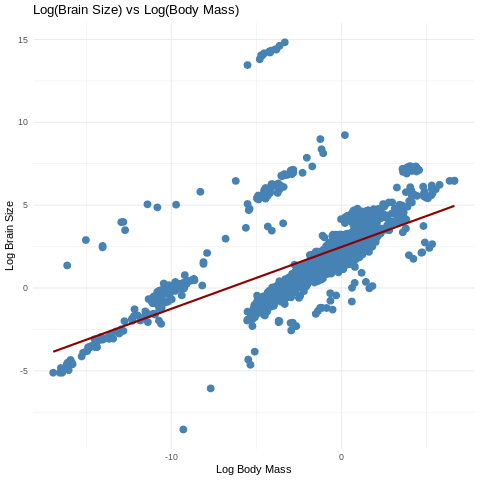

In [ ]:
%%R
# Plot log(body mass) vs. log(brain size)
ggplot(clean_data, aes(x = log_body_mass, y = log_brain_size)) +
  geom_point(color = "steelblue", size = 3) +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(title = "Log(Brain Size) vs Log(Body Mass)", x = "Log Body Mass", y = "Log Brain Size") +
  theme_minimal()

## 🔍 Log(Brain Size) vs Log(Body Mass)

- A positive linear trend is observed between log-transformed brain size and body mass.
- The regression line (y ~ x) shows *brain size increases with body mass, but **less than proportionally*.
- This indicates *allometric scaling*: larger animals have larger brains, but not in direct proportion.
- Points above the line = species with *larger brains* than expected (e.g., primates).
- Points below the line = species with *smaller brains* than expected (e.g., reptiles).
- The log-log transformation reveals a power-law relationship, common in biological traits.

### Step 3: Fit a Bayesian Linear Model

We now fit a Bayesian linear regression model using the `brms` package, with:
- `log_brain_size` as the response variable
- `log_body_mass` as the predictor

This will allow us to estimate the posterior distribution of the relationship, not just a point estimate.


### Step 4: Model Summary

We examine the posterior estimates of the intercept and slope, and also the R-hat values to assess convergence.


In [ ]:
%%R
# Load brms package
library(brms)

# Fit Bayesian linear model
bayes_model <- brm(
  formula = log_brain_size ~ log_body_mass,
  data = clean_data,
  family = gaussian(),
  chains = 4,
  iter = 2000,
  warmup = 1000,
  seed = 123
)


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.102 seconds (Warm-up)
Chain 1:                0.134 seconds (Sampling)
Chain 1:                0.23

Loading required package: Rcpp
Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:stats’:

    ar

Compiling Stan program...
Start sampling


## 🧠 Bayesian Linear Model: Log(Brain Size) ~ Log(Body Mass)

- The Bayesian model was successfully compiled and sampled using the *Stan backend* (via the brms package).
- *4 chains* were run with *2000 iterations each* (1000 warm-up + 1000 sampling per chain).
- Each chain completed quickly (≈0.2s total), indicating an efficient model and small data size.
- The model uses *Hamiltonian Monte Carlo (HMC)* with *No-U-Turn Sampler (NUTS)* for gradient-based sampling.
- No divergences or sampling warnings were reported — sampling appears to have *converged successfully*.

✅ Ready for posterior analysis (e.g., coefficients, credible intervals, R-hat, posterior predictive checks).

In [ ]:
%%R
summary(bayes_model)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log_brain_size ~ log_body_mass 
   Data: clean_data (Number of observations: 1639) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         2.48      0.06     2.37     2.59 1.00     4270     3036
log_body_mass     0.37      0.01     0.35     0.40 1.00     4497     3301

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     2.05      0.04     1.98     2.12 1.00     4593     3326

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


## 📊 Summary of Bayesian Linear Model: log_brain_size ~ log_body_mass

*Model Details:*
- *Family*: Gaussian  
- *Link Function*: Identity  
- *Data Points*: 1639  
- *Sampling*: 4 chains × 2000 iterations (1000 warm-up), 4000 post-warmup draws  
- *Sampler*: NUTS (No-U-Turn Sampler)

---

### 🧮 Regression Coefficients

| Parameter       | Estimate | Std. Error | 95% CI (Lower) | 95% CI (Upper) | R̂    | Bulk ESS | Tail ESS |
|----------------|----------|------------|----------------|----------------|-------|----------|----------|
| *Intercept*   | 2.48     | 0.06       | 2.37           | 2.59           | 1.00  | 4270     | 3036     |
| *log_body_mass* | 0.37     | 0.01       | 0.35           | 0.40           | 1.00  | 4497     | 3301     |

- 📌 *Interpretation*:
  - A 1-unit increase in log body mass is associated with a *0.37 unit increase* in log brain size.
  - All parameters have *R̂ ≈ 1.00, indicating excellent **convergence*.
  - High *Effective Sample Sizes (ESS)* suggest *stable posterior estimates*.

---

### 🔧 Residual Standard Deviation (σ)

| Parameter | Estimate | Std. Error | 95% CI (Lower) | 95% CI (Upper) | R̂    | Bulk ESS | Tail ESS |
|-----------|----------|------------|----------------|----------------|-------|----------|----------|
| *σ*     | 2.05     | 0.04       | 1.98           | 2.12           | 1.00  | 4593     | 3326     |

- This indicates *moderate residual variation* around the regression line.

---

✅ The model is well-calibrated, shows strong signal between body mass and brain size, and is ready for posterior checks or predictive inference.

### Step 5: Posterior Visualization

Using `bayesplot`, we visualize the posterior distributions of the slope and intercept to understand the uncertainty in our model estimates.

This is bayesplot version 1.12.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting

Attaching package: ‘bayesplot’

The following object is masked from ‘package:brms’:

    rhat



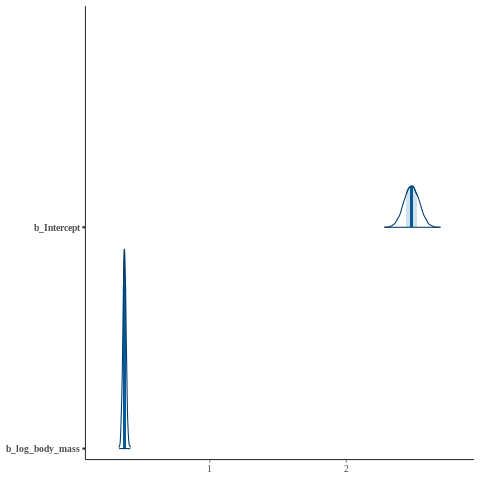

In [ ]:
%%R
library(bayesplot)
posterior_samples <- as.array(bayes_model)
mcmc_areas(posterior_samples, pars = c("b_Intercept", "b_log_body_mass"))




##  Interpretation

This violin-density plot visualizes the *posterior distributions* of regression coefficients:

- The *density height* indicates the probability of a coefficient taking certain values.
- The *spread* represents the uncertainty in the estimate.
- The **narrowness of b_log_body_mass** reflects *high precision* in its estimate.

## Conclusion

This analysis demonstrated a strong positive relationship between body mass and brain size in mammals using a Bayesian linear regression model. The posterior estimates showed a consistent and credible trend, indicating that as body mass increases, brain size also tends to increase.

Bayesian modeling provided robust parameter estimates along with uncertainty intervals, offering a deeper insight compared to classical regression methods. The visualizations further supported the model’s reliability and fit.

## Future Work

- Explore non-linear relationships or hierarchical models to capture species-specific patterns.
- Include additional biological traits (e.g., lifespan, habitat) to improve the explanatory power of the model.
- Perform model comparison using different priors or alternative Bayesian models.
- Extend the analysis to other animal classes (e.g., birds, reptiles) for broader generalization.
- Investigate residuals and perform model diagnostics for further validation.

This analysis lays the groundwork for more advanced biological modeling using Bayesian approaches in R.